
# Project: Investigate a Dataset  - European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **European Soccer Database**: It contains data for soccer matches, players, and teams from eleven European Leagues from 2008 to 2016.

> Questions I need to explore date to konw answers: 
>
> 1- Which are the top Teams that have the most wins per League?
>
> 2- What is the Total matchs, wins, goals per League?
>
> 3- Who are the top 10 players with highest rating?



<a id='intro'></a>
### Steps:

> 1- I open Soccer DB with SQLite browser, then exported data to CSV files and uploaded to SoccerDataSet folder.
>
> 2- Read csv Files with pandas
>
> 3- Explore and inspect data

In [1]:
# import  packages Iam plannig to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_country = pd.read_csv('SoccerDataSet/Country.csv')
df_league = pd.read_csv('SoccerDataSet/League.csv')
df_match = pd.read_csv('SoccerDataSet/Match.csv')
df_player = pd.read_csv('SoccerDataSet/Player.csv')
df_player_attributes = pd.read_csv('SoccerDataSet/Player_Attributes.csv')
df_sqlite_sequence = pd.read_csv('SoccerDataSet/sqlite_sequence.csv')    
df_team = pd.read_csv('SoccerDataSet/Team.csv')
df_team_attributes = pd.read_csv('SoccerDataSet/Team_Attributes.csv')

In [3]:
# explore dataset to understand the structure of the data and define what needed in cleaning part

In [4]:
#country.head(3)
#country.shape
#df_country.duplicated().sum()
df_country.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
#df_league.head(3)
#df_league.duplicated().sum()
df_league.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes


In [6]:
#df_match.head(3)
#df_match.info(verbose=True, null_counts=True)
#df_match.duplicated().sum()
df_match.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

In [7]:
#df_player.head(3)
df_player.info(verbose=True, null_counts=True)
#df_player.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [48]:
df_player['player_name'].duplicated().sum(),len(df_player.player_name.unique()), df_player['player_name'].count()

(212, 10848, 11060)

In [8]:
#df_player_attributes.head(3)
df_player_attributes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [9]:
#df_team.head(3)
df_team.info(verbose=True)
#df_team.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [55]:
df_team['team_long_name'].duplicated().sum(),len(df_team.team_long_name.unique()), df_team['team_long_name'].count()

(3, 296, 299)

In [58]:
df_team['team_long_name'].isnull().sum().any()

False

In [10]:
#df_team_attributes.head(3)
df_team_attributes.info(verbose=True)
#df_team_attributes.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin


### Data Cleaning (Remove columns with missing values, Convert column datatypes to its proper type and rename columns that need to be unique to be easy and clear to join data)

In [11]:
# Convert data types of 'date' columns represented as string to datetime
df_match['date'] = pd.to_datetime(df_match['date'])
df_player['birthday'] = pd.to_datetime(df_player['birthday'])
df_player_attributes['date'] = pd.to_datetime(df_player_attributes['date'])
df_team_attributes['date'] = pd.to_datetime(df_team_attributes['date'])


In [12]:
# rename ids columns to clear name
# rename names columns to clear name
df_match.rename(columns = {'id':'match_id','date':'match_date'}, inplace=True)

df_country.rename(columns = {'id':'country_id', 'name':'country_name'}, inplace=True)
df_league.rename(columns = {'id':'league_id', 'name':'league_name'}, inplace=True)
df_team.rename(columns = {'id':'team_id'}, inplace=True)
df_player.rename(columns = {'id':'player_id'}, inplace=True)


In [13]:
#delete all columns with null values
df_match.dropna(axis='columns', inplace=True)
df_match.head()

,match_id,country_id,league_id,season,stage,match_date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3


In [14]:
df_match.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
match_id            25979 non-null int64
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
match_date          25979 non-null datetime64[ns]
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 2.2+ MB


In [15]:
#create new column indicating Winner team id Or 0 if A draw
df_match['winner_team_api_id'] = np.where(df_match['home_team_goal'] > df_match['away_team_goal'], df_match['home_team_api_id'],
         np.where(df_match['home_team_goal'] < df_match['away_team_goal'], df_match['away_team_api_id'], 0 ))

#create new column indicating Loser team id Or 0 if A draw
df_match['loser_team_api_id'] = np.where(df_match['home_team_goal'] > df_match['away_team_goal'], df_match['away_team_api_id'],
         np.where(df_match['home_team_goal'] < df_match['away_team_goal'], df_match['home_team_api_id'], 0 ))

In [16]:
# Make a match_Merge for match DF and team DF to show winner team
pd.set_option('max_columns',40)

df_match_merge = df_match.merge(df_team, left_on='winner_team_api_id', right_on='team_api_id', how='left')
df_match_merge.drop(['team_id', 'team_api_id', 'team_fifa_api_id', 'team_short_name'], axis=1, inplace=True)
df_match_merge.rename(columns = {'team_long_name':'winner_team_name'}, inplace=True)
df_match_merge.head()

,match_id,country_id,league_id,season,stage,match_date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winner_team_api_id,loser_team_api_id,winner_team_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,0,0,NaN
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,0,0,NaN
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,8635,9984,RSC Anderlecht
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,9991,9998,KAA Gent
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,9985,7947,Standard de Liège


In [17]:
# Make a match_Merge for match DF and team DF to show loser team
df_match_merge = df_match_merge.merge(df_team, left_on='loser_team_api_id', right_on='team_api_id', how='left')

df_match_merge.drop(['team_id', 'team_api_id', 'team_fifa_api_id', 'team_short_name'], axis=1, inplace=True)
df_match_merge.rename(columns = {'team_long_name':'loser_team_name'}, inplace=True)
df_match_merge.head()


,match_id,country_id,league_id,season,stage,match_date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winner_team_api_id,loser_team_api_id,winner_team_name,loser_team_name
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,0,0,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,0,0,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,8635,9984,RSC Anderlecht,KSV Cercle Brugge
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,9991,9998,KAA Gent,RAEC Mons
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,9985,7947,Standard de Liège,FCV Dender EH


In [18]:
# Make a Merge for country DF and league DF
df_country_merge = df_country.merge(df_league, left_on='country_id', right_on='country_id', how='inner')

#country_merge.shape

In [19]:
# Make a Merge for match DF and country_merge DF
df_match_merge = df_match_merge.merge(df_country_merge, left_on='country_id', right_on='country_id', how='inner')
df_match_merge.drop(['league_id_y'], axis=1, inplace=True)
df_match_merge.rename(columns = {'league_id_x':'league_id'}, inplace=True)

In [20]:
df_match_merge['match_goals'] = df_match_merge['home_team_goal'] + df_match_merge['away_team_goal']
df_match_merge.head()

,match_id,country_id,league_id,season,stage,match_date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winner_team_api_id,loser_team_api_id,winner_team_name,loser_team_name,country_name,league_name,match_goals
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,0,0,NaN,NaN,Belgium,Belgium Jupiler League,2
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,0,0,NaN,NaN,Belgium,Belgium Jupiler League,0
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,8635,9984,RSC Anderlecht,KSV Cercle Brugge,Belgium,Belgium Jupiler League,3
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,9991,9998,KAA Gent,RAEC Mons,Belgium,Belgium Jupiler League,5
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,9985,7947,Standard de Liège,FCV Dender EH,Belgium,Belgium Jupiler League,4


In [21]:
# Make a Merge for player DF and player_attribute DF
df_player_merge = df_player.merge(df_player_attributes, left_on='player_api_id', right_on='player_api_id', how='inner')

#player_merge.shape

In [22]:
# Make a Merge for team DF and team_attribute DF
df_team_merge = df_team.merge(df_team_attributes, left_on='team_api_id', right_on='team_api_id', how='inner')

#team_merge.shape

In [23]:
# Save cleaned dataframes as new CSV files
df_match_merge.to_csv('SoccerDataSet/Matches_Clean.csv', index=False)
df_country_merge.to_csv('SoccerDataSet/Country_Clean.csv', index=False)
df_team_merge.to_csv('SoccerDataSet/Team_Clean.csv', index=False)
df_player_merge.to_csv('SoccerDataSet/Player_Clean.csv', index=False)

df_league.to_csv('SoccerDataSet/League_Clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


### Research Question 1 (What is the Total matchs, wins, goals per League?)

### I liked to explore and get stats about Leagues, teams, matches and goals.

In [24]:
# Total matchs per League
df_match_merge.groupby(['league_name'])['match_id'].count()

league_name
Belgium Jupiler League      1728
England Premier League      3040
France Ligue 1              3040
Germany 1. Bundesliga       2448
Italy Serie A               3017
Netherlands Eredivisie      2448
Poland Ekstraklasa          1920
Portugal Liga ZON Sagres    2052
Scotland Premier League     1824
Spain LIGA BBVA             3040
Switzerland Super League    1422
Name: match_id, dtype: int64

In [25]:
#total Draws per League
df_match_merge.query('winner_team_api_id == 0').groupby(['league_name'])['winner_team_api_id'].count()

league_name
Belgium Jupiler League      425
England Premier League      783
France Ligue 1              859
Germany 1. Bundesliga       597
Italy Serie A               796
Netherlands Eredivisie      581
Poland Ekstraklasa          525
Portugal Liga ZON Sagres    533
Scotland Premier League     447
Spain LIGA BBVA             704
Switzerland Super League    346
Name: winner_team_api_id, dtype: int64

In [26]:
#total Wins per League
df_match_merge.query('winner_team_api_id != 0')['league_name'].value_counts()
#df_match_merge.groupby(['league_name'])['winner_team_name'].count()

Spain LIGA BBVA             2336
England Premier League      2257
Italy Serie A               2221
France Ligue 1              2181
Netherlands Eredivisie      1867
Germany 1. Bundesliga       1851
Portugal Liga ZON Sagres    1519
Poland Ekstraklasa          1395
Scotland Premier League     1377
Belgium Jupiler League      1303
Switzerland Super League    1076
Name: league_name, dtype: int64

In [27]:
#total Goals per League
df_match_merge.groupby(['league_name'])['match_goals'].sum()

league_name
Belgium Jupiler League      4841
England Premier League      8240
France Ligue 1              7427
Germany 1. Bundesliga       7103
Italy Serie A               7895
Netherlands Eredivisie      7542
Poland Ekstraklasa          4656
Portugal Liga ZON Sagres    5201
Scotland Premier League     4804
Spain LIGA BBVA             8412
Switzerland Super League    4166
Name: match_goals, dtype: int64

In [28]:
# most season with goals
df_season_goals = df_match_merge.groupby(['league_name','season'])['match_goals'].sum()
df_season_goals.nlargest(1)

league_name      season   
Spain LIGA BBVA  2008/2009    1101
Name: match_goals, dtype: int64

In [29]:
# most match Goals per League
df_match_merge.groupby(['league_name'])['match_goals'].max()

league_name
Belgium Jupiler League       9
England Premier League      10
France Ligue 1              10
Germany 1. Bundesliga       11
Italy Serie A                9
Netherlands Eredivisie      10
Poland Ekstraklasa           8
Portugal Liga ZON Sagres     9
Scotland Premier League     12
Spain LIGA BBVA             12
Switzerland Super League     9
Name: match_goals, dtype: int64

Text(0,0.5,'Wins')

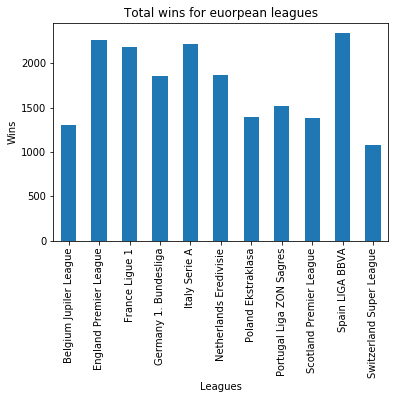

In [30]:
#plot the overall wins
df_match_merge.groupby(['league_name'])['winner_team_name'].count().plot(kind='bar', title='Total wins for euorpean leagues');
plt.xlabel('Leagues')
plt.ylabel('Wins')

### Research Question 2 (Which are the top Teams that have the most wins per League?)

In [31]:
#get most teams with Wins

def top_value_count(x, n=1):
    return x['winner_team_name'].value_counts().head(n)

df_winnerCount = df_match_merge.query('winner_team_api_id != 0').groupby(['league_name'])
df_top_winners = df_winnerCount.apply(top_value_count).reset_index()
df_top_winners.rename(columns={'winner_team_name':'total_wins'})
df_top_winners = df_top_winners.rename(columns={'level_1':'winner_team_name', 'winner_team_name':'total_wins'})

df_top_winners = df_top_winners.sort_values(by=['total_wins'], ascending=False)
df_top_winners

,league_name,winner_team_name,total_wins
9,Spain LIGA BBVA,FC Barcelona,234
8,Scotland Premier League,Celtic,218
3,Germany 1. Bundesliga,FC Bayern Munich,193
1,England Premier League,Manchester United,192
4,Italy Serie A,Juventus,189
7,Portugal Liga ZON Sagres,SL Benfica,185
5,Netherlands Eredivisie,Ajax,181
10,Switzerland Super League,FC Basel,180
2,France Ligue 1,Paris Saint-Germain,175
6,Poland Ekstraklasa,Legia Warszawa,137


In [32]:
#get most teams with Loses
def top_value_count(x, n=1):
    return x['loser_team_name'].value_counts().head(n)

df_loserCount = df_match_merge.query('loser_team_api_id != 0').groupby(['league_name'])
df_top_losers = df_loserCount.apply(top_value_count).reset_index()
df_top_losers.rename(columns={'loser_team_name':'total_wins'})
df_top_losers = df_top_losers.rename(columns={'level_1':'loser_team_name', 'loser_team_name':'total_loses'})

df_top_losers = df_top_losers.sort_values(by=['total_loses'], ascending=False)
df_top_losers

,league_name,loser_team_name,total_loses
8,Scotland Premier League,Kilmarnock,142
9,Spain LIGA BBVA,Getafe CF,139
1,England Premier League,Sunderland,134
4,Italy Serie A,Chievo Verona,129
7,Portugal Liga ZON Sagres,Vitória Setúbal,125
3,Germany 1. Bundesliga,Hannover 96,124
5,Netherlands Eredivisie,Willem II,119
6,Poland Ekstraklasa,Polonia Bytom,119
2,France Ligue 1,OGC Nice,117
10,Switzerland Super League,FC Sion,113


Text(0,0.5,'Wins')

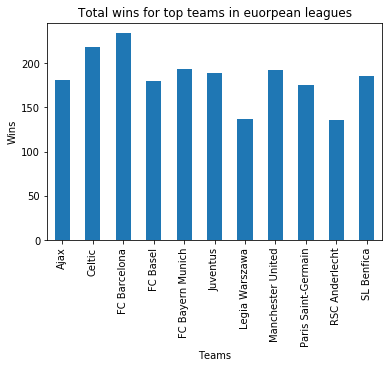

In [33]:
#plot the top winners for each league
df_top_winners.groupby(['winner_team_name'])['total_wins'].sum().plot(kind='bar', title='Total wins for top teams in euorpean leagues');
plt.xlabel('Teams')
plt.ylabel('Wins')
#df_top_winners.sort_values('total_wins', ascending=True).groupby(['winner_team_name'])['total_wins'].sum().plot(kind='bar', title='Wins');

### Research Question 3 (Who are the top 10 players with highest rating?)

In [34]:
df_player_series = df_player_merge.groupby("player_name")['overall_rating'].mean()
df_player_series.nlargest(10)

player_name
Lionel Messi          92.192308
Cristiano Ronaldo     91.280000
Franck Ribery         88.458333
Andres Iniesta        88.320000
Zlatan Ibrahimovic    88.285714
Arjen Robben          87.840000
Xavi Hernandez        87.636364
Wayne Rooney          87.222222
Iker Casillas         86.954545
Philipp Lahm          86.733333
Name: overall_rating, dtype: float64

In [35]:
df_player_merge.head()

,player_id,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id,player_fifa_api_id_y,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,1,218353,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2,218353,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,3,218353,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,4,218353,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,5,218353,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### Plot correlation between Player rating and different attributes

Text(0.5,1,'Correlation between Player potential and overall rating')

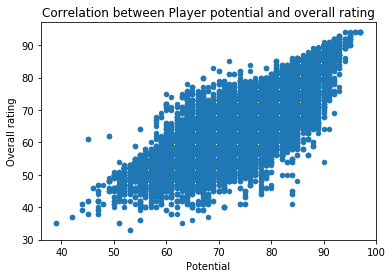

In [59]:
df_player_merge.plot(x='potential', y='overall_rating', kind='scatter');
plt.xlabel('Potential')
plt.ylabel('Overall rating')
plt.title('Correlation between Player potential and overall rating')

<a id='conclusions'></a>
## Limitations
> 1- Match table has alot of missing data
>
> 2- Data needed few steps to be cleaned as, Ids columns name is not unique and Dates columns data types are existed as string
>
> 3- Some data is duplicated as team_long_name and player_name
>

<a id='conclusions'></a>
## Conclusions

> 1- France Ligue 1 and Spain LIGA BBVA  have most played matches 
>
> 2- Season 2008/2009 in Spain LIGA BBVA have highest number of goals by 1101 goals in all Leagues from 2008 to 2016 
>
> 3- FC Barcelona achieved highest number of wins
>
> 4- Lionel Messi has the most overall rating from 2008 to 2016 
>
> 5- There is a positive correlation between Player potential and overall rating

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_European_Soccer_Dataset.ipynb'])

0